In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Integrais

In [3]:
def integral_np(f, a, b, n):
    h = (b-a)/n
    return h*((f(a)*1/2 + f(b)*1/2) + np.sum(f(a+np.arange(1,n)*(h))))

f = lambda x: x**4-2*x+1

integral_np(f,0,2,10)

4.50656


### Método de Simpson

In [4]:
def simpson_integral(f, a, b, n):
    h = (b-a)/n
    k = np.arange(1,(n/2)+1)
    return (1/3)*h*( f(a) + f(b) + 4*np.sum(f(a+(2*k-1)*h)) + 2*np.sum(f(a+2*(k[:-1])*h)) )

simpson_integral(f,0,2,10)

4.400426666666667

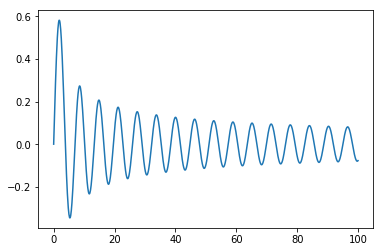

In [15]:
def bessel_func(x):
    return (1/np.pi)*simpson_integral(lambda theta: np.cos(theta-x*np.sin(theta)),0,np.pi,1000)

axisx = np.linspace(0,100,1000)
axisy = []
for i in axisx:
    axisy.append(bessel_func(i))
    
plt.plot(axisx, axisy)

In [16]:
def Ifunc(r):
    k = 2*np.pi/0.5**-6
    return (bessel_func(k*r)/k*r)**2
Ifunc(2)

3.9616013376947437

# EDO's

### Método Runge Kutta

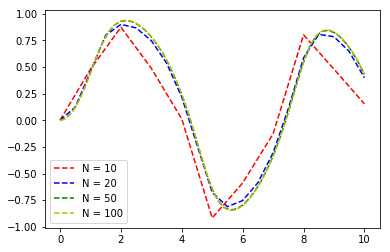

In [44]:
f = lambda x,t: -x**3+np.sin(t)

def metRK(f, x0, ti, tf, n):
    x=x0
    h = (ti+tf)/n
    xpoints = []
    tpoints = np.arange(ti,tf+h,h)
    for t in tpoints:
        k1 = h*f(x,t)
        k2 = h*f(x+k1/2, t+h/2)
        xpoints.append(x)
        x += k2
    return tpoints, xpoints


t, x = metRK(f, 0, 0, 10, 10)
plt.plot(t, x, 'r--')
t, x = metRK(f, 0, 0, 10, 20)
plt.plot(t, x,  'b--')
t, x = metRK(f, 0, 0, 10, 50)
plt.plot(t, x,  'g--')
t, x = metRK(f, 0, 0, 10, 100)
plt.plot(t, x, 'y--')
plt.legend(['N = 10','N = 20','N = 50','N = 100'])


plt.show()

# Sistemas de EDO's

### Método Runge Kutta 4 sistema de EDO

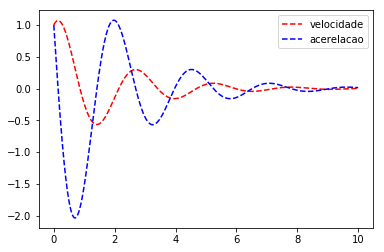

In [24]:
def metRKsys(f, r0, ti, tf, n):
    r=r0
    h = (ti+tf)/n
    xpoints = []
    ypoints = []
    tpoints = np.arange(ti,tf+h,h)
    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        k1 = h*f(r,t)
        k2 = h*f(r+k1/2, t+h/2)
        k3 = h*f(r+k2/2, t+h/2)
        k4 = h*f(r+k3, t+h)
        r += (1/6)*(k1+2*k2+2*k3+k4)
    return xpoints, ypoints, tpoints

def f(r,t):
    delta = 1
    w = 0.8*np.pi
    
    x,v = r
    fx = v
    fv = -w**2*x-delta*v
    return np.array([fx,fv])

r0 = np.array([1.,1.])
n = 1000
t = np.linspace(0,10,n+1)
x, y, t = metRKsys(f, r0, 0, 10, n)
plt.plot(t, x, 'r--')
plt.plot(t, y, 'b--')
plt.legend(['velocidade', 'acerelacao'])


plt.show()